# Frequently Used Commands for Exploratory Data Analysis

## Table of Contents
1. **[Data Dictionary](#data_description)**
2. **[Metadata](#metadata)**
3. **[Summary Stats and Univariate Charts](#summ_stats)**
4. **[Bivariate Analysis](#bivar)**

<a id = 'data_description'> </a>
## Data Dictionary

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of program, etc.
    * Phone Activity: Had a Phone Conversation with a representative, Had a conversation over SMS with a representative, etc.
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc.

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

**Import Relevant Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
raw_data = pd.read_csv("data/online_educ.csv")

**Make a Copy of raw_data**

In [3]:
data = raw_data.copy()
data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


<a id = 'metadata'> </a>
## Metadata
Get the overall data shape, the non-null counts and variable type by column, and check for duplicates.

In [4]:
data.shape

(4612, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [6]:
# duplicated() returns a vector of Boolean values indicating whether a row is a duplicate of an earlier row
data.duplicated().sum()

0

In [7]:
# use df object .nunique() to check the number of unique values within a column
data['ID'].nunique()

4612

**An aside `duplicated()`: it does not 'count' the first instance of a duplicate, so sorting matters.  THe nice thing is that is more natural for de-duping.**

In [8]:
test = pd.DataFrame({'A':(1,1,2,2), 'B':(1,1,"",2)})
test.T

,0,1,2,3
A,1,1,2,2
B,1,1,,2


In [9]:
test.duplicated().T

0    False
1     True
2    False
3    False
dtype: bool

<a id = 'summ_stats'> </a>
## Summary Stats and Univariate Charts

**Get simple summary stats of float/int variables**

In [10]:
data.describe(percentiles = (0.05, 0.25, 0.5, 0.75, 0.95)).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
age,4612.0,46.201214,13.161454,18.0,21.00000,36.00000,51.000,57.00000,60.000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,1.00000,2.00000,3.000,5.00000,9.000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,1.00000,148.75000,376.000,1336.75000,2209.450,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,0.08255,2.07775,2.792,3.75625,6.765,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.00000,0.000,1.00000,1.000,1.000


**Plot the Distributions of each of the numerical variables**

age
Skew : -0.72


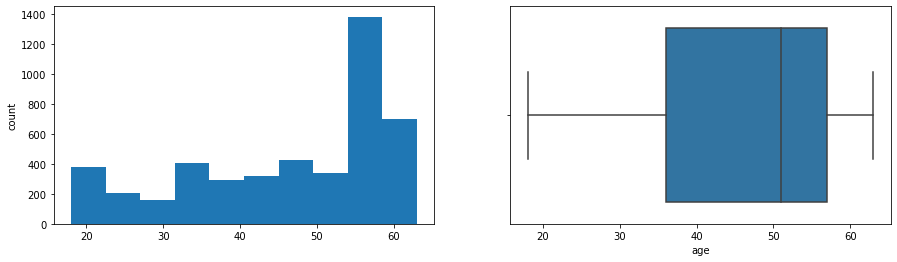

website_visits
Skew : 2.16


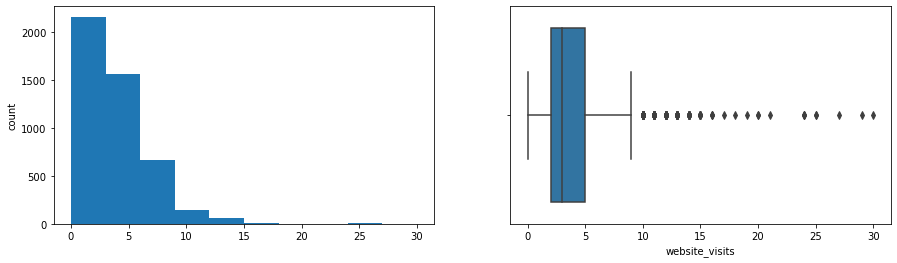

time_spent_on_website
Skew : 0.95


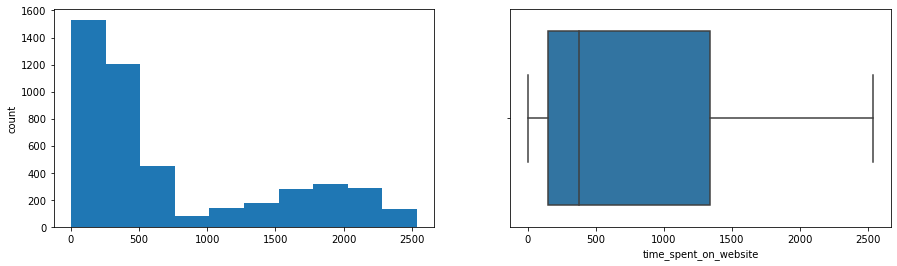

page_views_per_visit
Skew : 1.27


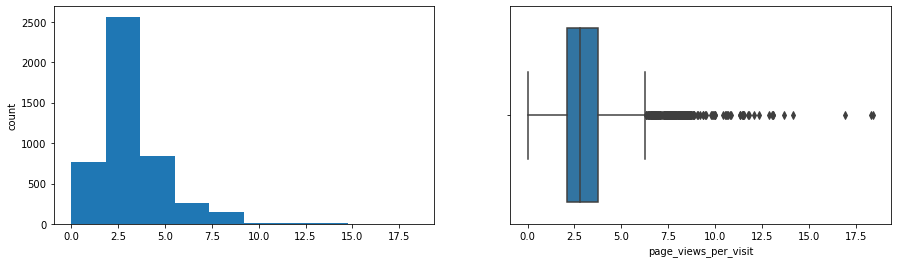

status
Skew : 0.88


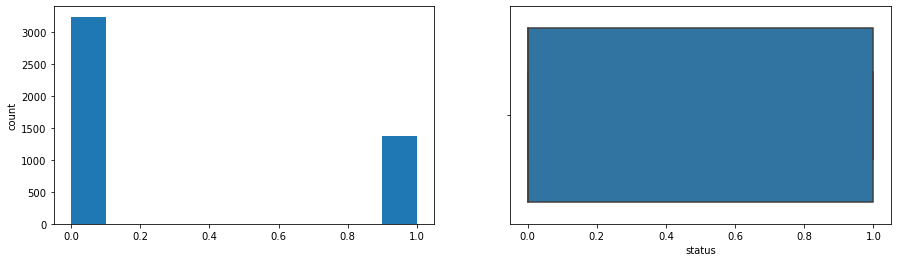

In [11]:
### Two ways to tee up loop

num_col = list(data.select_dtypes('number').columns)
#num_col = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

for col in num_col:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Get frequency of each value for each of the categorical values**

In [12]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing count of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 43)

EXT1732    0.000217
EXT1669    0.000217
EXT1433    0.000217
EXT482     0.000217
EXT2096    0.000217
             ...   
EXT4316    0.000217
EXT1651    0.000217
EXT3238    0.000217
EXT2859    0.000217
EXT4488    0.000217
Name: ID, Length: 4612, dtype: float64
-------------------------------------------
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
-------------------------------------------
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
-------------------------------------------
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
-------------------------------------------
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
-------------------------------------------
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
---------------------------

<a id = 'bivar'> </a>
## Bivariate Analysis

**Create histograms of enrollment status by occupation**

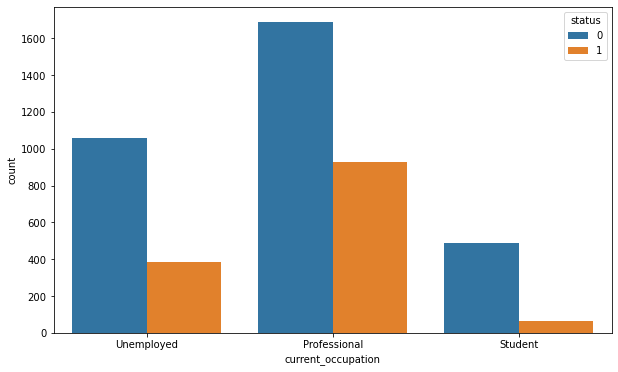

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=data)
plt.show()

**Summary stats with by-variables**

In [14]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


**Correlation Coefficient Heat Map Matrix**

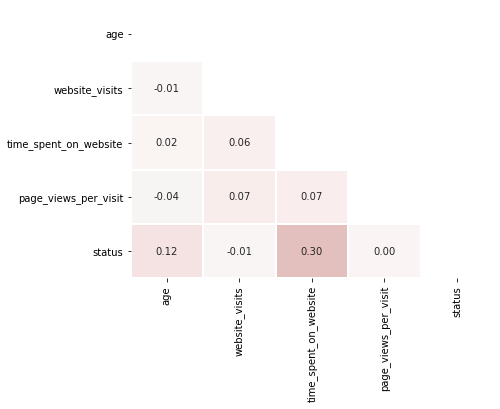

In [15]:
plt.figure( figsize=(6.5, 5),      #width, height in inches
            num = 'Corr_Heat_Map', #unique ID for figure
          )

# Hide diagonal and upper triangle
mask = np.triu(np.ones_like(data.corr()))

sns.heatmap( data.corr(),         # .corr() is an attribute of the pd df
             annot=True,          # add values as labels
             fmt=".2f",           # format for labels (2 dec place float)
             vmin = -1, vmax = 1, # scales color scheme to [-1,1]
             linewidths = 1,      # insert nice clear cell borders
             cbar = False,        # toggle legend
             cmap = 'vlag',       # cool/hot color palette
             mask = mask          # assign values that should be masked
           )

plt.show()

**Scatterplot with dots distinguished by categorical variable and scaled to z-var**

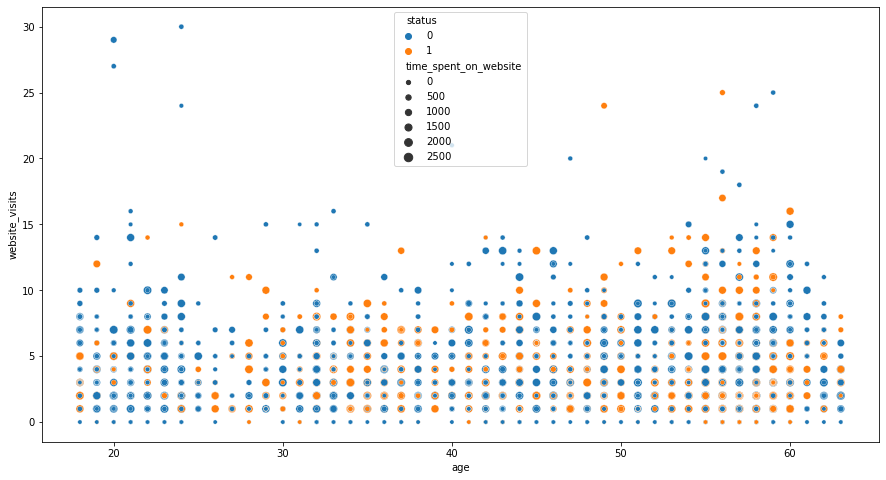

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, 
           x='age', 
           y='website_visits', 
           hue='status',
           size='time_spent_on_website');